# Udacity Data Analyst Project 07: Data Wrangling

## Introduction

Wrangling Data is an importing issue within the iterative circle of data analysis since real-world data rarely comes clean. Additionally multiple sources are needed to gather alle the data required for a complete analysis or visualization of a topic.

## Context and Tasks

The aim of this document is to show the data wrangling of WeRateDogs Twitter data to prepare the data content for further analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for interesting analyses and visualizations.

To fulfill the task of this project, only original ratings are considered to wrangle this dataset. Thus, no retweets are gathered.
For assessing and cleaning the dataset, at least 8 quality issues and at least 2 tidiness issues have to be tackled. Cleaning includes merging individual pieces of data according to the rules of tidy data.

## The Data

### Enhanced Twitter Archive

First, the WeRateDogs Twitter archive containing basic tweet data for all 5000+ of their tweets is given as a CSV-file by Udacity. This data is downloaded programmatically, but not all data are correct and well formatted. A assessment and cleaning is needed to prepare this data for further work.

### Additional Data via the Twitter API

The Twitter archives data can be supplemented by gathering data from the website using Twitter's API. Here, the tweet IDs within the Twitter archive can be used to access this data of all 5000+ tweets

### Image Predictions File

To classify the dogs within the tweets, an image prediction using a neural network can be applied. An image prediction data file (TSV-file) has to be programmatically accessed.

## Preparation

The next code cell imports required libraries and modules for further tasks. Furthermore, new functions and configurations are defined.

In [1]:
import tweepy
import json
import time
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Twitter API configuration
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

# Set column width to infinity to see the whole text
pd.set_option('display.max_colwidth', -1)

## Gathering Data

In this section, the data required for the WeRateDogs dataset is gathered. Therefor, the Enhanced Twitter Archive is read and converted into a Panda DataFrame. Additionally, the image prediction file hosted on Udacity's server is downloaded programmatically.
At least, the tweet IDs in the WeRateDogs Twitter archive are used to query the Twitter API for each tweet's JSON data and saved into the tweet_json.txt file. Afterwards, this .txt file is read line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count. 

In [2]:
# Read Enhanced Twitter Archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download programmatically the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [4]:
# Read image-prediction-file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Create list to store the dictionaries of our result
tweet_data_list = []
# Create list to store the tweet_id of the errors
error_list = []

# Start time for measurement of processing time
start = time.time()

# iterative loop of twitter_archive to get tweet_ids
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        favorite_count = tweet['favorite_count'] # count of likes
        retweet_count = tweet['retweet_count'] # count of retweets
        
        tweet_data_list.append({'tweet_id': int(tweet_id),
                        'favorite_count': int(favorite_count),
                        'retweet_count': int(retweet_count)})
        print(str(tweet_id) + ' queried successfully!')                
    # Catch the exceptions of TweepErrors
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

# Finish time for measurement of processing time
end = time.time()
print(end - start)

Rate limit reached. Sleeping for: 23


892420643555336193 queried successfully!
892177421306343426 queried successfully!
891815181378084864 queried successfully!
891689557279858688 queried successfully!
891327558926688256 queried successfully!
891087950875897856 queried successfully!
890971913173991426 queried successfully!
890729181411237888 queried successfully!
890609185150312448 queried successfully!
890240255349198849 queried successfully!
890006608113172480 queried successfully!
889880896479866881 queried successfully!
889665388333682689 queried successfully!
889638837579907072 queried successfully!
889531135344209921 queried successfully!
889278841981685760 queried successfully!
888917238123831296 queried successfully!
888804989199671297 queried successfully!
888554962724278272 queried successfully!
888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136 queried successfully!
887705289381826560 queried successfully!
887517139158093824 queried successfully!
88747395710395188

Rate limit reached. Sleeping for: 591


758740312047005698 _ Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Eine vorhandene Verbindung wurde vom Remotehost geschlossen', None, 10054, None))
758474966123810816 queried successfully!
758467244762497024 queried successfully!
758405701903519748 queried successfully!
758355060040593408 queried successfully!
758099635764359168 queried successfully!
758041019896193024 queried successfully!
757741869644341248 queried successfully!
757729163776290825 queried successfully!
757725642876129280 queried successfully!
757611664640446465 queried successfully!
757597904299253760 queried successfully!
757596066325864448 queried successfully!
757400162377592832 queried successfully!
757393109802180609 queried successfully!
757354760399941633 queried successfully!
756998049151549440 queried successfully!
756939218950160384 queried successfully!
756651752796094464 queried successfully!
756526248105566208 queried successfully!
756303284449767430 queried successfully!


Rate limit reached. Sleeping for: 598


676957860086095872 _ Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Eine vorhandene Verbindung wurde vom Remotehost geschlossen', None, 10054, None))
676949632774234114 queried successfully!
676948236477857792 queried successfully!
676946864479084545 queried successfully!
676942428000112642 queried successfully!
676936541936185344 queried successfully!
676916996760600576 queried successfully!
676897532954456065 queried successfully!
676864501615042560 queried successfully!
676821958043033607 queried successfully!
676819651066732545 queried successfully!
676811746707918848 queried successfully!
676776431406465024 queried successfully!
676617503762681856 queried successfully!
676613908052996102 queried successfully!
676606785097199616 queried successfully!
676603393314578432 queried successfully!
676593408224403456 queried successfully!
676590572941893632 queried successfully!
676588346097852417 queried successfully!
676582956622721024 queried successfully!


In [6]:
# Print lengh of tweet_data_list and error_list
print("Lengh of tweet_data_list:", len(tweet_data_list))
print("Lengh of error_list:", len(error_list))

Lengh of tweet_data_list: 2339
Lengh of error_list: 17


Results:
- limit of tweepy API reached twice (but automatically wait for rate limits to replenish)

- total time: 2024 seconds (~34min)

- number of correct tweet_ids: 2339 

- number of erroneous tweet_ids: 17

In [7]:
# Convert list to DataFrame 
tweet_data = pd.DataFrame(tweet_data_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

# Save dataFrame in file (JSON format)
tweet_data.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [8]:
# Read tweet_json.txt file into Pandas dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38298,8398
1,892177421306343426,32820,6196
2,891815181378084864,24716,4100
3,891689557279858688,41625,8528
4,891327558926688256,39789,9244
5,891087950875897856,19982,3075
6,890971913173991426,11696,2041
7,890729181411237888,64631,18636
8,890609185150312448,27463,4215
9,890240255349198849,31515,7290


In [9]:
# read tweet_id from the twitter_archive dataframe and use it within a for-loop to access the tweet by applying the Twitter API.
# write the JSON daa into a txt file and read it afterwards into a pandas dataframe.

#with open('tweet_json.txt', 'a', encoding='utf8') as jsonfile:
#    for tweet_id in twitter_archive['tweet_id']:
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, jsonfile)
#            jsonfile.write('\n')
#        except:
#            continue

In [10]:
# append each tweet into a list iteratively in a for-loop
#tweet_data = []
#jsonfile = open('tweet_json.txt', "r")

#for line in jsonfile:
#    try:
#        tweet = json.loads(line)
#        tweet_data.append(tweet)
#    except:
#        continue
        
#jsonfile.close()

## Assess

In this section, the assessment of the datasets is presented. At first, an overview is given by displaying the first five rows. Additionally, a summary of the columns is shown to inspect the datatypes as well as missing values within the datasets.

### Dataset overview

In [11]:
# inspect twitter_archive
twitter_archive.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [12]:
# inspect the dataframe by using the info-function
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The dataset 'twitter_archive' contains 17 columns with 2356 observations. The columns are:

- tweet_id (number after status in URL)

- in_reply_to_status_id (in case of reply: id of tweet)

- in_reply_to_user_id (in case of reply: id of user)

- timestamp (date and time of tweet)

- source (source the tweet was released from)

- text (text content)

- retweeted_status_id (in case of retweet: id of tweet)

- retweeted_status_user_id (in case of retweet: id of user)

- retweeted_status_timestamp (in case of retweet: timestamp of tweet)

- expanded_urls (url of images)

- rating_numerator (rating of dog)

- rating_denominator (base of rating, usually 10)

- name (name of dog)

- doggo (dog stage)

- floofer (dog stage) 

- pupper (dog stage)

- puppo (dog stage)

The data types of each variable are displayed in the info cell above.

In [13]:
# inspect image_predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# inspect the dataframe by using the info-function
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


The dataset 'image_predictions' contains 12 columns with 2075 observations. The columns are:

- tweet_id

- jpg_url (image url)

- img_num (image number)

- p1 (the algorithm's number one prediction for the image)

- p1_conf (how confident is the algorithm in its number one prediction)

- p1_dog (whether or not the number one prediction is a breed of dog)

- p2 (the algorithm's number two prediction for the image)

- p2_conf (how confident is the algorithm in its number two prediction)

- p2_dog (whether or not the number two prediction is a breed of dog)

- p3 (the algorithm's number three prediction for the image)

- p3_conf (how confident is the algorithm in its number three prediction)

- p3_dog (whether or not the number three prediction is a breed of dog)

The data types of each variable are displayed in the info cell above.

In [15]:
# inspect tweet_data_clean using the info-function
tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38298,8398
1,892177421306343426,32820,6196
2,891815181378084864,24716,4100
3,891689557279858688,41625,8528
4,891327558926688256,39789,9244


In [16]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


The dataset 'tweet_data' contains 3 columns with 2339 observations. The columns are:

- tweet_id (ID of Tweet)

- favorite_count (Count of likes of a tweet)

- retweet_count (Count of retweets of a tweet)

The data types for each column are int64.

### Datasets in detail

The following subsection gives detailled information about several aspects of each dataset. This supports the identification process of quality and tidiness issues.

- inspect the variables (or column headers) of each dataset to find duplicated variables

In [17]:
# show duplicated column names in all three tables
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

- since retweets are not needed for analysis, we have to find retweets within the dataset

In [18]:
# show tweets with non-null retweeted_status_id
twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [19]:
# count tweets with non-null retweeted_status_id
sum(twitter_archive['retweeted_status_id'].notnull())

181

- each tweet has to contain an image, hence, we have to find tweets without any images (identification by the expanded_urls column)

In [20]:
# show tweets without expanded_urls
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
# count tweets without expanded_urls
sum(twitter_archive['expanded_urls'].isnull())

59

- inspect the 'name' column to find odd or incorrect names

In [22]:
# sort values in the 'name' column
# strings with only lowercases might not be real names. They are listed at the bottom.
twitter_archive.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [23]:
# show rows where the 'name' only consists of lowercase characters
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [24]:
# show rows where the string 'name' appears in the 'text' column 
# in these rows, an actual dog name could be found in the text
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('name'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https

In [25]:
# show dog names with only one letter
# since words might be split incorrectly, errors in the 'name' column could occur
twitter_archive['name'] = twitter_archive['name'].astype('str')
mask = twitter_archive['name'].str.len() == 1
twitter_archive.loc[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only 

In [26]:
# in the cell above, we can see a dog name that only consists of the letter 'O'
twitter_archive[twitter_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


- inspect the 'source' column to get more information

In [27]:
# view number of unique values for each source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

- inspect the rating denominator, which has to be 10 within the whole rating system of WeRateDogs

In [28]:
# show values and counts of 'rating_denominator'
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [29]:
# show rows where the rating_denominator differs from 10
twitter_archive[twitter_archive['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [30]:
# in the cell above, we can also find a tweet without any rating
twitter_archive[twitter_archive['tweet_id']==810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


- inspect the 'rating_numerator' and 'text' to find floats or additional rating information

In [31]:
# show rows where 'text' column contains #.#/# indicating a decimal float for the rating numerator
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

c:\python35\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


- inspect the 'text' column for the right encoding of special characters

In [32]:
# show tweets with text containing '&' combined with at least another character
twitter_archive[twitter_archive['text'].str.contains('&+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05

### Assessment issues
#### Quality

- dataset contains retweets (have to be dropped)

- dataset contains tweets with no images (have to be removed)

- incorrect dog names, like 'the' or 'a', as well as missing values

- html code within the source column is not relevant and hard to read

- wrong rating denominator (has to be 10 within the rating system)

- rating numerator containing decimal are not presented as float

- special characters within the 'text' column are not well encoded (e.g. '&' is sometimes displayed as '&amp;')

- wrong datatypes (e.g. timestamp has to be a datetime object)

#### Tidiness

- dog stage variable is presented in four columns: doggo, floofer, pupper, puppo

- tweet information from twitter_archive, image_predictions and the tweet counts are not in the same table

## Cleaning

This section is for cleaning purposes. Therefor, we will tackle the issues, we have identified in the assessment section. For each issue three subsections are created to define, code and test the cleaning of the data.

In [33]:
# To retain the original datasets, copies of the data have to be created
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

#### Define
Identify the dog stage from the 'text' column. Create a new dog_stage column as type category with the values puppo, pupper, floofer and doggo. Set the value to NaN, if no information are given in the 'text'.

#### Code

In [34]:
# Create 'dog_stage' column by extracting the dog stage variables from the text column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

In [35]:
# drop the original dog stage variables from the dataframe twitter_archive_clean
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [36]:
# show the first 20 rows of dataset to inspect the dog_stage column
twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a colle

In [37]:
# inspect the dataframe using the info-function
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 186.5+ KB


#### Define

The dataset contains retweets. These entries are not needed and can be dropped. 
The 'retweeted_status_id' column identifies retweets.
#### Code

In [38]:
# retain the data where the retweeted_status_id is NaN (i.e. tweets that are no retweets)
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [39]:
# check whether the count of retweeted_status_id is zero
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 189.1+ KB


#### Define

The dataset contains tweets without any images. These entries are not needed and can be dropped.
If the 'expanded_urls' columns is empty, the tweet does not contain any image data.
#### Code

In [40]:
# drop tweets with NaN in the 'expanded_urls' columns
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [41]:
# sum up the 'expanded_urls' columns containing NaN values (have to be zero)
sum(twitter_archive_clean.expanded_urls.isnull())

0

In [42]:
# show summary of twitter_archive_clean - now, the number of 'expanded_urls' equals the number of tweet_ids
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
dog_stage                     356 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 184.1+ KB


#### Define
The name of the dogs are not correct for many tweets. Therefor different steps have to be performed

1. identify locations with lowercase 'name' and where the 'text' contains the strings 'named' or 'name is'

2. identify tweets where no name is mentioned 

3. store these oberservations in three new dataframes and convert them to lists

4. iterate through each list to replace the dogs name by using the word after 'named' or 'name is'

5. iterate through the list containing tweets with no dog names and set each value to 'None' 

6. replace the incorrect entry with 'name' 'O' with 'O'Malley'

#### Code

In [43]:
# define the name column for further wrangling
name_column = 'name'

# identify and save locations where the 'name' is lowercase and the 'text' contains the strings 'named' and 'name is'
replace_named = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('named'))]
replace_name_is = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('name is'))]

# convert to lists
replace_named_list = replace_named['text'].tolist()
replace_name_is_list = replace_name_is['text'].tolist()

# iterate through locations defined by 'replace_named' and set the value to the string found after 'named' in the 'text' column
for entry in replace_named_list:
    mask = twitter_archive_clean.text == entry
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# iterate through locations defined by 'replace_name_is' and set the value to the string found after 'name is' in the 'text' column   
for entry in replace_name_is_list:
    mask = twitter_archive_clean.text == entry
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)

In [44]:
# identify the remaining locations with lowercase names
replace_none = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower())]

# Save these locations as lists
replace_none_list = replace_none['text'].tolist()

# iterate through the remaining locations defined by 'replace_none' and set the value to 'NaN'
for entry in replace_none_list:
    mask = twitter_archive_clean.text == entry
    twitter_archive_clean.loc[mask, name_column] = 'None'
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None',np.NaN)

In [45]:
# Replace the dogs name "O" with "O'Malley"
twitter_archive_clean.name = twitter_archive_clean.name.replace("O", "O'Malley")

#### Test

In [46]:
# sort 'name' column to search for lowercase dog names
twitter_archive_clean.name.sort_values()

1021    Abby        
1035    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
412     Albus       
144     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
367     Alfie       
2238    Alfie       
1616    Alfie       
858     Alfie       
2235    Alfonso     
2161    Alfredo     
51      Alfy        
201     Alice       
1701    Alice       
2146    Alphred     
1495    Amber       
1334    Ambrose     
         ...        
2326    NaN         
2327    NaN         
2328    NaN         
2329    NaN         
2330    NaN         
2331    NaN         
2332    NaN         
2333    NaN         
2334    NaN         
2335    NaN         
2336    NaN         
2337    NaN         
2338    NaN         
2339    NaN         
2340    NaN         
2341    NaN         
2342    NaN  

In [47]:
# count NaN values in the 'name' column
sum(twitter_archive_clean.name.isnull())

704

In [48]:
# look for the name of "O'Malley"
twitter_archive_clean[twitter_archive_clean['name']=="O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN


#### Define
Change 'source' column to more readable form of categories. Remove the html code and define four categories

#### Code

In [49]:
# Replace html code with category name
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [50]:
# convert the datatype of 'source' column to 'category'
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

#### Test

In [51]:
# count the values for each category
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1985
Vine                  91  
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

In [52]:
# check the datatype using the .info() summary
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null category
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1413 non-null object
dog_stage                     356 non-null category
dtypes: category(2), float64(4), int64(3), object(5)
memory usage: 178.0+ KB


#### Define

The rating_denominator has to be 10 in the rating system. We have to set each rating_denominator to 10.
#### Code

In [53]:
# set each rating_denominator to 10
twitter_archive_clean.rating_denominator = 10

#### Test

In [54]:
# count the rating_denominator values
twitter_archive_clean.rating_denominator.value_counts()

10    2117
Name: rating_denominator, dtype: int64

#### Define
Fix the rating_numerator column:

1. Remove tweet without any rating (tweet_id: 810984652412424192)

2. Change the datatype of rating_numerator and rating_denominator

3. identify ratings with decimal in the text

4. replace the rating numerator

#### Code

In [55]:
# Drop observation without any rating
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]

In [56]:
# Change datatype of rating_numerator and denominator to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')

In [57]:
# Set correct numerators for specific tweets, which have been identified in the assessement section
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 666287406224695296) & (twitter_archive_clean['rating_numerator'] == 1), ['rating_numerator']] = 9.0

#### Test

In [58]:
# Check the identified tweet ids with decimals in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

c:\python35\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,pupper


In [59]:
# Check whether the tweet without any rating has been removed
twitter_archive_clean[twitter_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [60]:
# Check datatype of rating_numerator and rating_denomination
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2116 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null object
source                        2116 non-null category
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null float64
rating_denominator            2116 non-null float64
name                          1412 non-null object
dog_stage                     356 non-null category
dtypes: category(2), float64(6), int64(1), object(5)
memory usage: 177.9+ KB


#### Define
Fix the incorrect encoding of '&' which is displayed as '&amp;' in the 'text' column

#### Code

In [61]:
# use the str.replace function to fix the incorrect encoding
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;','&')

#### Test

In [62]:
# Search for String '&amp;' in the 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Define
Merge tweet_data_clean and the twitter_archive daraframe as well as the image_predictions on the tweet_id. Use a left join and set the value of favorite_count and retweet_count to zero in case no information are given.

#### Code

In [63]:
# Merge the tweet_data_clean and twitter_archive dataframe using pandas merge function
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_data_clean, on='tweet_id', how='left')

In [64]:
# Merge the image_predictions and twitter_archive dataframe using pandas merge function
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=image_predictions, on='tweet_id', how='left')

#### Test

In [65]:
# show a sample of 20 tweets of the merged dataframe
twitter_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1509,679722016581222400,NaN,NaN,2015-12-23 17:55:32 +0000,Twitter for iPhone,This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10 https://t.co/NL5QJwdEpF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679722016581222400/photo/1,...,1.0,boxer,0.459604,True,Boston_bull,0.197913,True,French_bulldog,0.087023,True
653,766313316352462849,NaN,NaN,2016-08-18 16:38:26 +0000,Twitter for iPhone,This is Oscar. He has legendary eyebrows and he h*ckin knows it. Curly af too. 12/10 would hug passionately https://t.co/xuxZoObmF0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766313316352462849/photo/1,...,1.0,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True
335,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,Twitter for iPhone,This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889702862852/photo/1,...,1.0,Doberman,0.763539,True,black-and-tan_coonhound,0.136602,True,miniature_pinscher,0.087654,True
215,842163532590374912,NaN,NaN,2017-03-16 00:00:07 +0000,Twitter for iPhone,Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",...,2.0,French_bulldog,0.891227,True,soccer_ball,0.022811,False,bull_mastiff,0.012852,True
564,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,Twitter for iPhone,This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/781251288990355457/photo/1,https://twitter.com/dog_rates/status/781251288990355457/photo/1",...,2.0,Mexican_hairless,0.887771,True,Italian_greyhound,0.030666,True,seat_belt,0.026730,False
90,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,Twitter for iPhone,This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1",...,2.0,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
986,716791146589110272,NaN,NaN,2016-04-04 00:55:01 +0000,Twitter for iPhone,Meet Jennifur. She's supposed to be navigating. Not even buckled up. Insubordinate & churlish. 11/10 would still pet https://t.co/h0trcJohYO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716791146589110272/photo/1,...,1.0,Pomeranian,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True
1522,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,Twitter for iPhone,This dog doesn't know how to stairs. Quite tragic really. 9/10 get it together pup https://t.co/kTpr9PTMg1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485189439488/photo/1,...,1.0,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
882,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,Vine,Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,Twitter for iPhone,This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708

In [66]:
# show structure of merged dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 27 columns):
tweet_id                      2116 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null object
source                        2116 non-null category
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null float64
rating_denominator            2116 non-null float64
name                          1412 non-null object
dog_stage                     356 non-null category
favorite_count                2113 non-null float64
retweet_count                 2113 non-null float64
jpg_url                       1993 non-null object
img_num                      

#### Define
Remove the retweeted-columns since they do not contain any data

#### Code

In [67]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [68]:
# show structure of merged dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 24 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2116 non-null object
source                   2116 non-null category
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1412 non-null object
dog_stage                356 non-null category
favorite_count           2113 non-null float64
retweet_count            2113 non-null float64
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null object
p2                       1993 non-null object
p2_conf      

#### Define
Adjust the datatypes of the variables as follows:

- tweet_id -> string

- in_reply_to_status_id -> string

- in_reply_to_user_id -> string

- pX_dog -> boolean

- timestamp -> datetime

#### Code

In [69]:
# convert the mentioned datatypes using astype-function
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')
twitter_archive_clean['p1_dog'] = twitter_archive_clean['p1_dog'].astype('bool')
twitter_archive_clean['p2_dog'] = twitter_archive_clean['p2_dog'].astype('bool')
twitter_archive_clean['p3_dog'] = twitter_archive_clean['p3_dog'].astype('bool')
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [70]:
# show structure and datatypes of dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 24 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    2116 non-null object
in_reply_to_user_id      2116 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null category
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1412 non-null object
dog_stage                356 non-null category
favorite_count           2113 non-null float64
retweet_count            2113 non-null float64
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   2116 non-null bool
p2                       1993 non-null object
p2_c

## Store
In this final section, the wrangled dataset is stored in a CSV-file. Thus, the cleaned data can be imported by reading this file into a dataframe.

In [71]:
# use pandas to_csv() function to store the dataframe
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analyses and Visualizations
This section shows some analyses of the wrangled data as well as some visualizations. 
To begin a new part of this document and to avoid the whole data wrangling process, we load the stored CSV-file and convert it into a pandas DataFrame.

In [72]:
# Read CSV-file and inspect the dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant 

### Insight #1: Count of Dog Types
The image prediction enables an assignment of the tweets' images to certain dog types. This assignment is given with a certain confidence level. We assume that the first prediction is correct.

Thus, we want to count the numbers for each dog type and visualize them in a histogram. Therefor, we only take the 20 most frequent dog types into account. We also have to filter the images that contain dogs (p1_dog = True)

In [73]:
# count values of prediction p1
df[df.p1_dog==True].p1.value_counts()

golden_retriever               138
Labrador_retriever             95 
Pembroke                       88 
Chihuahua                      79 
pug                            54 
chow                           41 
Samoyed                        40 
Pomeranian                     38 
toy_poodle                     38 
malamute                       29 
cocker_spaniel                 27 
French_bulldog                 26 
Chesapeake_Bay_retriever       23 
miniature_pinscher             22 
German_shepherd                20 
Siberian_husky                 20 
Staffordshire_bullterrier      19 
Eskimo_dog                     18 
Shetland_sheepdog              18 
Maltese_dog                    18 
Shih-Tzu                       17 
Rottweiler                     17 
beagle                         17 
Cardigan                       17 
kuvasz                         16 
Italian_greyhound              16 
Lakeland_terrier               16 
West_Highland_white_terrier    14 
Great_Pyrenees      

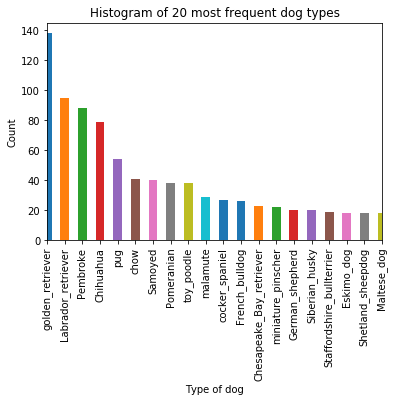

In [74]:
# Plot Histogram of dog types (p1)
df[df.p1_dog==True]['p1'].value_counts().plot(kind='bar');
plt.xlim(0,19)
plt.title('Histogram of 20 most frequent dog types')
plt.xlabel('Type of dog')
plt.ylabel('Count');

# save figure
fig = plt.gcf()
fig.savefig('histogram_dogtypes.png',bbox_inches='tight');

### Insight #2: Mean rating of Dog types

Besides the count of dog types, it is interesting to get information about the rating of dog types. Are there any differences between the dog types? Are some dogs cuter than others and, hence, have a higher rating?
We also want to know, which dog has the highest and which dog has the lowest rating.

In [75]:
# calculate mean of rating for dog types and save in new dataframe
mean_rating_dogtypes = df[df.p1_dog==True].groupby('p1')['rating_numerator'].mean()
mean_rating_dogtypes.head(10)

p1
Afghan_hound                      9.666667 
Airedale                          9.833333 
American_Staffordshire_terrier    11.000000
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.000000
Bernese_mountain_dog              11.200000
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Name: rating_numerator, dtype: float64

In [76]:
# Sort values to identify the dog types with the highest and lowest mean rating
mean_rating_dogtypes.sort_values()

p1
Japanese_spaniel               5.000000 
Ibizan_hound                   9.000000 
Norwich_terrier                9.000000 
Scotch_terrier                 9.000000 
Walker_hound                   9.000000 
Welsh_springer_spaniel         9.000000 
Tibetan_terrier                9.250000 
miniature_schnauzer            9.250000 
dalmatian                      9.333333 
Boston_bull                    9.444444 
Afghan_hound                   9.666667 
redbone                        9.666667 
Maltese_dog                    9.722222 
Rhodesian_ridgeback            9.750000 
Airedale                       9.833333 
Saint_Bernard                  9.833333 
English_setter                 9.857143 
miniature_poodle               9.875000 
Italian_greyhound              9.937500 
Brabancon_griffon              10.000000
Bedlington_terrier             10.000000
papillon                       10.000000
groenendael                    10.000000
Great_Dane                     10.111111
Newfoundland 

In [77]:
# Find rating of the dog with the lowest rating
df[df['p1_dog']==True]['rating_numerator'].sort_values().head(1)

1537    2.0
Name: rating_numerator, dtype: float64

In [78]:
# Find rating of the dog with the highest rating
df[df['p1_dog']==True]['rating_numerator'].sort_values().tail(1)

701    165.0
Name: rating_numerator, dtype: float64

In [79]:
# show url of dog with lowest rating a save the image manually
df[(df['p1_dog']==True) & (df['rating_numerator']==2.0)].expanded_urls.values[0]

'https://twitter.com/dog_rates/status/678424312106393600/photo/1'

In [80]:
# show url of dog with highest rating a save the image manually
df[(df['p1_dog']==True) & (df['rating_numerator']==165.0)].expanded_urls.values[0]

'https://twitter.com/dog_rates/status/758467244762497024/video/1'

### Insight #3: Number of retweets and likes vs. Ratings
In the last insight, we want to explore the correlation between ratings given by the publisher and the counts of retweets and likes. Are dog images only rated subjectively or is there a relationship to an objective opinion (identified by the number of likes) with regard to that image?

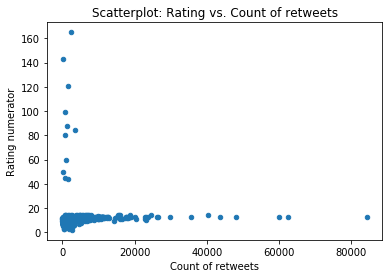

In [81]:
# perform a scatter plot of retweet_count vs. rating_numerator
df[df['p1_dog']==True].plot(x='retweet_count',y='rating_numerator',kind='scatter');
plt.title('Scatterplot: Rating vs. Count of retweets')
plt.xlabel('Count of retweets')
plt.ylabel('Rating numerator');

As you can see, we have a few outlier at low retweet count numbers. Thus, we cut the y-axis to get a better look on most of the data.

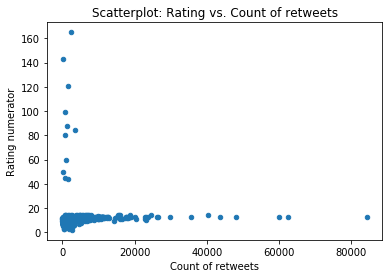

In [84]:
# perform a scatter plot of retweet_count vs. rating_numerator
df[df['p1_dog']==True].plot(x='retweet_count',y='rating_numerator',kind='scatter');
plt.title('Scatterplot: Rating vs. Count of retweets')
plt.xlabel('Count of retweets')
plt.ylabel('Rating numerator');

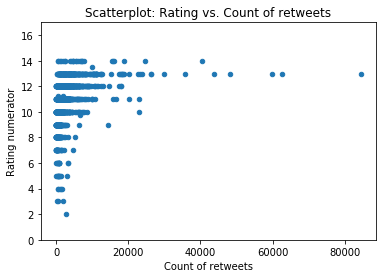

In [82]:
# perform a scatter plot of retweet_count vs. rating_numerator
df[df['p1_dog']==True].plot(x='retweet_count',y='rating_numerator',kind='scatter');
plt.ylim(0,17)
plt.title('Scatterplot: Rating vs. Count of retweets')
plt.xlabel('Count of retweets')
plt.ylabel('Rating numerator');

# save figure
fig = plt.gcf()
fig.savefig('rating_vs_retweet.png',bbox_inches='tight');

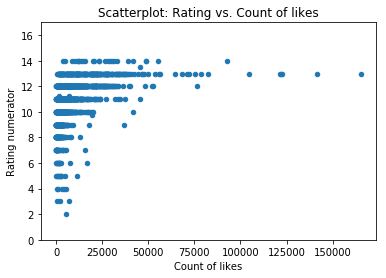

In [83]:
# perform a scatter plot of favorite_count vs. rating_numerator
df[df['p1_dog']==True].plot(x='favorite_count',y='rating_numerator',kind='scatter');
plt.ylim(0,17)
plt.title('Scatterplot: Rating vs. Count of likes')
plt.xlabel('Count of likes')
plt.ylabel('Rating numerator');

# save figure
fig = plt.gcf()
fig.savefig('rating_vs_likes.png',bbox_inches='tight');